In [19]:
import os
import sys
from collections import defaultdict
from pathlib import Path
from typing import Dict, List, Literal, Optional, Tuple, Union

import IPython
import matplotlib.pyplot as plt
import logging
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib.axes import Axes as Axes

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
from src.utils.Csv import Csv
from src.utils.iso18571 import rating_iso_18571_short
from src.utils.set_rcparams import set_rcparams
from src.utils.UnifySignal import UnifySignal

os.chdir(project_dir)
LOG = logging.getLogger(__name__)
custom_log.init_logger(logging.INFO)
LOG.info("Log initialized")

set_rcparams()

2024-10-14 19:58:12,108     INFO  MainProcess  MainThread Log initialized
2024-10-14 19:58:12,112     INFO  MainProcess  MainThread Setting rcparams for matplotlib
2024-10-14 19:58:12,126     INFO  MainProcess  MainThread Using style src/visualization/dissertation.mplstyle


In [3]:
D_DIR: Path = Path("/mnt/q/Val_Chain_Sims")
D_DIR.is_dir()

True

In [4]:
# read report data
CSV = Csv(csv_path=D_DIR / "From_Reports" / "extracted.csv.zip", compress=True)
DB_REPORT: pd.DataFrame = CSV.read()
REPORT_ASS = ["HW TH Report", "CAE TH Report"]
DB_REPORT.replace({"CAE NHTSA": REPORT_ASS[1], "Test NHTSA": REPORT_ASS[0]}, inplace=True)
DB_REPORT.fillna(0, inplace=True)
display(DB_REPORT)

2024-10-14 19:39:47,281     INFO  MainProcess  MainThread Read /mnt/q/Val_Chain_Sims/From_Reports/extracted.csv.zip


Value   Time             Channel         Source           Case
0      -0.0454    1.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
1       0.2117    2.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
2       0.4767    3.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
3       0.6952    4.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
4       0.6031    5.0  00COG00000VH00ACXD  CAE TH Report   Full Frontal
...        ...    ...                 ...            ...            ...
16953  14.7103  135.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16954  14.7095  136.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16955  14.7089  137.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16956  14.7082  138.0  00COG00000VH00VERD   HW TH Report  Oblique Right
16957  14.7069  139.0  00COG00000VH00VERD   HW TH Report  Oblique Right

[16958 rows x 5 columns]

In [5]:
# read CAE THOR data
CSV = Csv(csv_path=D_DIR / "Honda_Accord_2014_Original_THOR_2_7" / f"extracted.csv.zip", compress=True)
DB_CAE_THOR: pd.DataFrame = CSV.read()
DB_CAE_THOR.replace(
    {"Assemblies_1": "SP 48", "Assemblies_2": "DP 48", "Assemblies_3": "SP 96", "Assemblies_4": "DP 96"}, inplace=True
)
DB_CAE_THOR.fillna(0, inplace=True)
display(DB_CAE_THOR)

2024-10-14 19:40:09,628     INFO  MainProcess  MainThread Read /mnt/q/Val_Chain_Sims/Honda_Accord_2014_Original_THOR_2_7/extracted.csv.zip


Time    Value             Channel   Source Assembly  \
0          0.0  15.5587  00COG00000VH00VEXD  CAE THI    SP 48   
1          0.1  15.5586  00COG00000VH00VEXD  CAE THI    SP 48   
2          0.2  15.5584  00COG00000VH00VEXD  CAE THI    SP 48   
3          0.3  15.5583  00COG00000VH00VEXD  CAE THI    SP 48   
4          0.4  15.5582  00COG00000VH00VEXD  CAE THI    SP 48   
...        ...      ...                 ...      ...      ...   
4841851  139.6 -30.6234  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841852  139.7 -30.6206  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841853  139.8 -30.6182  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841854  139.9 -30.6161  03PELVLOC0TH50DSZD  CAE THI    DP 96   
4841855  140.0 -30.6143  03PELVLOC0TH50DSZD  CAE THI    DP 96   

                               Configuration           Case  Side  
0        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   0.0  
1        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   0.0  
2        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   0.0  
3        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   0.0  
4        Honda_Accord_2014_Original_THOR_2_7   Full Frontal   0.0  
...                                      ...            ...   ...  
4841851  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   0.0  
4841852  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   0.0  
4841853  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   0.0  
4841854  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   0.0  
4841855  Honda_Accord_2014_Original_THOR_2_7  Oblique Right   0.0  

[4841856 rows x 8 columns]

In [6]:
# read CAE HIII data
CSV = Csv(csv_path=D_DIR / "Honda_Accord_2014_Original_with_HIII" / f"extracted.csv.zip", compress=True)
DB_CAE_HIII: pd.DataFrame = CSV.read()
DB_CAE_HIII.replace(
    {"Assemblies_1": "SP 48", "Assemblies_2": "DP 48", "Assemblies_3": "SP 96", "Assemblies_4": "DP 96"}, inplace=True
)
DB_CAE_HIII.fillna(0, inplace=True)
display(DB_CAE_HIII)

2024-10-14 19:40:35,462     INFO  MainProcess  MainThread Read /mnt/q/Val_Chain_Sims/Honda_Accord_2014_Original_with_HIII/extracted.csv.zip


Time    Value             Channel   Source Assembly  \
0          0.0  15.5587  00COG00000VH00VEXD  CAE THI    SP 48   
1          0.1  15.5586  00COG00000VH00VEXD  CAE THI    SP 48   
2          0.2  15.5585  00COG00000VH00VEXD  CAE THI    SP 48   
3          0.3  15.5583  00COG00000VH00VEXD  CAE THI    SP 48   
4          0.4  15.5582  00COG00000VH00VEXD  CAE THI    SP 48   
...        ...      ...                 ...      ...      ...   
4841851  139.6 -22.2245  03PELVLOC0H350DSZD  CAE THI    DP 96   
4841852  139.7 -22.2235  03PELVLOC0H350DSZD  CAE THI    DP 96   
4841853  139.8 -22.2225  03PELVLOC0H350DSZD  CAE THI    DP 96   
4841854  139.9 -22.2216  03PELVLOC0H350DSZD  CAE THI    DP 96   
4841855  140.0 -22.2209  03PELVLOC0H350DSZD  CAE THI    DP 96   

                                Configuration           Case  Side  
0        Honda_Accord_2014_Original_with_HIII   Full Frontal   0.0  
1        Honda_Accord_2014_Original_with_HIII   Full Frontal   0.0  
2        Honda_Accord_2014_Original_with_HIII   Full Frontal   0.0  
3        Honda_Accord_2014_Original_with_HIII   Full Frontal   0.0  
4        Honda_Accord_2014_Original_with_HIII   Full Frontal   0.0  
...                                       ...            ...   ...  
4841851  Honda_Accord_2014_Original_with_HIII  Oblique Right   0.0  
4841852  Honda_Accord_2014_Original_with_HIII  Oblique Right   0.0  
4841853  Honda_Accord_2014_Original_with_HIII  Oblique Right   0.0  
4841854  Honda_Accord_2014_Original_with_HIII  Oblique Right   0.0  
4841855  Honda_Accord_2014_Original_with_HIII  Oblique Right   0.0  

[4841856 rows x 8 columns]

In [7]:
# read CAE HIII Speed data
CSV = Csv(csv_path=D_DIR / "Honda_Accord_2014_Sled_with_HIII_RuntimeMin" / f"extracted.csv.zip", compress=True)
DB_CAE_SPEED: pd.DataFrame = CSV.read()
DB_CAE_SPEED.replace(
    {"Assemblies_1": "SP 48", "Assemblies_2": "DP 48", "Assemblies_3": "SP 96", "Assemblies_4": "DP 96"}, inplace=True
)
DB_CAE_SPEED.fillna(0, inplace=True)
display(DB_CAE_SPEED)

2024-10-14 19:41:18,167     INFO  MainProcess  MainThread Read /mnt/q/Val_Chain_Sims/Honda_Accord_2014_Sled_with_HIII_RuntimeMin/extracted.csv.zip


Time    Value             Channel   Source Assembly  \
0          0.0 -15.5577  00COG00000VH00VEXD  CAE THI    SP 48   
1          0.1 -15.5576  00COG00000VH00VEXD  CAE THI    SP 48   
2          0.2 -15.5574  00COG00000VH00VEXD  CAE THI    SP 48   
3          0.3 -15.5572  00COG00000VH00VEXD  CAE THI    SP 48   
4          0.4 -15.5570  00COG00000VH00VEXD  CAE THI    SP 48   
...        ...      ...                 ...      ...      ...   
5951443  139.6 -24.1677  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951444  139.7 -24.1425  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951445  139.8 -24.1203  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951446  139.9 -24.1010  03PELVLOC0H350DSZD  CAE THI    DP 96   
5951447  140.0 -24.0847  03PELVLOC0H350DSZD  CAE THI    DP 96   

                                       Configuration           Case Side  
0        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
1        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
2        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
3        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
4        Honda_Accord_2014_Sled_with_HIII_RuntimeMin   Full Frontal   DR  
...                                              ...            ...  ...  
5951443  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951444  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951445  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951446  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  
5951447  Honda_Accord_2014_Sled_with_HIII_RuntimeMin  Oblique Right   PA  

[5951448 rows x 8 columns]

In [8]:
DB_CAES = (DB_CAE_THOR, DB_CAE_HIII, DB_CAE_SPEED)

In [10]:
UNIFIER = UnifySignal(target_tstart_ms=20, target_tend_ms=120, target_sampling_rate_ms=0.1)

In [11]:
def label(idx:int, setting:str) -> str:
    sim_id = ["D", "D", "S"]
    dummy_id = ["TH", "H3", "H3"]

    return f"CAE {dummy_id[idx]}_{sim_id[idx]}_{setting}"

In [12]:
# outer key is load case, inner key is channel
REFERENCES: Dict[str, Dict[str, pd.DataFrame]] = defaultdict(dict)
CHALLENGERS: Dict[str, pd.DataFrame] = defaultdict(dict)

In [13]:
def add_pulse(case: Literal["Oblique Right", "Oblique Left"]) -> None:
    channels = [
        ["00COG00000VH00VEXD", "00COG00000VH00VEYD"],
        ["00COG00000VH00ACXD", "00COG00000VH00ACYD"],
    ]
    LOG.info("Processing load case %s with %s channels", case, len(sum(channels, [])))

    for ch in sum(channels, []):
        LOG.info("Processing channel %s", ch)
        references = {}
        challengers = {}

        # add report data (always CFC60)
        report = DB_REPORT[DB_REPORT["Channel"].eq(ch) & DB_REPORT["Case"].eq(case)]
        for i, ass in enumerate(REPORT_ASS, 1):
            report2 = report[report["Source"].eq(ass)]
            flip = (
                -1
                if (ch == "00COG00000VH00VEXD" and case != "Full Frontal")
                or (ch == "00COG00000VH00ACXD")
                or (ch == "00COG00000VH00VEYD" and case == "Oblique Left")
                or (ch == "00COG00000VH00ACYD" and case == "Oblique Right")
                else 1
            )

            if report2.shape[0] > 0:
                references[ass] = pd.Series((report2["Value"] * flip).to_numpy(), index=report2["Time"])

        if references:
            references = pd.DataFrame(references)
            LOG.info("References shape before unification %s", references.shape)
            references = UNIFIER.unify(references)
            references.index = [np.round(x, 1) for x in references.index]
            LOG.info("References shape  after unification %s", references.shape)
        else:
            LOG.warning("No report data for channel %s", ch)

        # determine cae flip
        flip = (
            -1
            if (ch == "00COG00000VH00VEXD")
            or (ch == "00COG00000VH00ACXD")
            or (ch == "00COG00000VH00VEYD" and case == "Oblique Left")
            or (ch == "00COG00000VH00VEYD" and case == "Oblique Right")
            or (ch == "00COG00000VH00ACYD" and case == "Oblique Right")
            or (ch == "00COG00000VH00ACYD" and case == "Oblique Left")
            else 1
        )

        # filter CAE data
        for i, db_cae in enumerate(DB_CAES):
            LOG.info("Processing %s", i)
            flip2 = 1 if i in {0, 1} else -1
            cae = db_cae[db_cae["Channel"].eq(ch) & db_cae["Case"].eq(case) & (db_cae["Side"].eq("PA") | db_cae["Side"].eq(0))]
            cae.loc[:, "Value"] *= flip * flip2

            # plot single curves
            for setting in sorted(cae["Assembly"].unique()):
                LOG.info("Processing %s", label(i, setting))
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                cae2 = cae2[cae2["Time"].between(UNIFIER.target_tstart_ms, UNIFIER.target_tend_ms)]
                challengers[label(i, setting)] = cae2["Value"].to_numpy()
                time = cae2["Time"].to_numpy()
                LOG.debug("Case %s with shape %s", label(i, setting), challengers[label(i, setting)].shape)

        challengers = pd.DataFrame(challengers, index=time)
        LOG.info("Challengers shape after unification: %s", challengers.shape)

        if isinstance(references, pd.DataFrame):
            references = pd.concat([references, challengers], axis=1)         
        else:
            references = challengers.copy()
        LOG.info("References shape after concatenation: %s", references.shape)

        REFERENCES[case][ch] = references.copy()
        LOG.info("Add channel %s of shape %s to references", ch, references.shape)
        CHALLENGERS[case][ch] = challengers.copy()
        LOG.info("Add channel %s of shape %s to challengers", ch, challengers.shape)

    LOG.info("References now has %s load cases with %s channels", len(REFERENCES.keys()), len(REFERENCES[case].keys()))
    LOG.info("Challengers now has %s load cases with %s channels", len(CHALLENGERS.keys()), len(CHALLENGERS[case].keys()))

In [14]:
def add_restraint(side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left"]) -> None:
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}FAB00000VH00PRRD", f"{s}BELTBUSLVH00DSRD"],
        [f"{s}BELTB000VH00DSRD", f"{s}BELTB000VH00FORD"],
        [f"{s}BELTB300VH00FORD", f"{s}BELTB400VH00FORD"],
        [f"{s}BELTB500VH00FORD", f"{s}BELTB600VH00FORD"],
    ]
    LOG.info("Processing load case %s side %s with %s channels", case, side, len(sum(channels, [])))

    for ch in sum(channels, []):
        LOG.info("Processing channel %s", ch)
        references = {}
        challengers = {}

        # plot report data
        chh = f"{ch[:10]}TH50{ch[14:-1]}D"
        report = DB_REPORT[DB_REPORT["Channel"].eq(chh) & DB_REPORT["Case"].eq(case)]
        for i, ass in enumerate(REPORT_ASS, 1):
            report2 = report[report["Source"].eq(ass)]
            if report2.shape[0] > 0:
                references[ass] = pd.Series((report2["Value"]).to_numpy(), index=report2["Time"])

        if references:
            references = pd.DataFrame(references)
            LOG.info("References shape before unification %s", references.shape)
            references = UNIFIER.unify(references)
            references.index = [np.round(x, 1) for x in references.index]
            LOG.info("References shape  after unification %s", references.shape)
        else:
            LOG.warning("No report data for channel %s", ch)

        # plot CAE data
        for i, db_cae in enumerate(DB_CAES):
            # filter CAE data
            cae = db_cae[db_cae["Channel"].eq(ch) & db_cae["Case"].eq(case)]
            if "BELTB0" in ch and "DS" in ch:
                cae["Value"] -= cae["Value"].min()

            # plot single curves
            for setting in sorted(cae["Assembly"].unique()):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                cae2 = cae2[cae2["Time"].between(UNIFIER.target_tstart_ms, UNIFIER.target_tend_ms)]
                challengers[label(i, setting)] = cae2["Value"].to_numpy()
                time = cae2["Time"].to_numpy()
                LOG.debug("Case %s with shape %s", label(i, setting), challengers[label(i, setting)].shape)

        challengers = pd.DataFrame(challengers, index=time)
        LOG.info("Challengers shape after unification: %s", challengers.shape)

        if isinstance(references, pd.DataFrame):
            references = pd.concat([references, challengers], axis=1)         
        else:
            references = challengers.copy()
        LOG.info("References shape after concatenation: %s", references.shape)

        REFERENCES[case][ch] = references.copy()
        LOG.info("Add channel %s of shape %s to references", ch, references.shape)
        CHALLENGERS[case][ch] = challengers.copy()
        LOG.info("Add channel %s of shape %s to challengers", ch, challengers.shape)

    LOG.info("References now has %s load cases with %s channels", len(REFERENCES.keys()), len(REFERENCES[case].keys()))
    LOG.info("Challengers now has %s load cases with %s channels", len(CHALLENGERS.keys()), len(CHALLENGERS[case].keys()))

In [15]:
def add_body_acc(
    side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left"], part: Literal["HEAD", "CHST", "PELV"]
) -> None:
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}{part}0000??50ACRD", f"{s}{part}0000??50ACXD"],
        [f"{s}{part}0000??50ACYD", f"{s}{part}0000??50ACZD"],
    ]
    LOG.info("Processing load case %s side %s with %s channels", case, side, len(sum(channels, [])))

    for ch in sum(channels, []):
        LOG.info("Processing channel %s", ch)
        references = {}
        challengers = {}
        # plot report data
        report = DB_REPORT[DB_REPORT["Channel"].eq(ch.replace("??", "TH")) & DB_REPORT["Case"].eq(case)]
        flip = -1 if "HEAD0000??50ACX" in ch or "HEAD0000??50ACZ" in ch else 1

        for i, ass in enumerate(REPORT_ASS, 1):
            report2 = report[report["Source"].eq(ass)]
            if report2.shape[0] > 0:
                references[ass] = pd.Series((report2["Value"] * flip).to_numpy(), index=report2["Time"])

        if references:
            references = pd.DataFrame(references)
            LOG.info("References shape before unification %s", references.shape)
            references = UNIFIER.unify(references)
            references.index = [np.round(x, 1) for x in references.index]
            LOG.info("References shape  after unification %s", references.shape)
        else:
            LOG.warning("No report data for channel %s", ch)

        # plot CAE data
        for i, db_cae in enumerate(DB_CAES):
            # filter CAE data
            cae = db_cae[db_cae["Channel"].eq(ch.replace("??", "TH" if i == 0 else "H3")) & db_cae["Case"].eq(case)]

            # plot single curves
            for setting in sorted(cae["Assembly"].unique()):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                cae2 = cae2[cae2["Time"].between(UNIFIER.target_tstart_ms, UNIFIER.target_tend_ms)]
                challengers[label(i, setting)] = cae2["Value"].to_numpy()
                time = cae2["Time"].to_numpy()
                LOG.debug("Case %s with shape %s", label(i, setting), challengers[label(i, setting)].shape)

        challengers = pd.DataFrame(challengers, index=time)
        LOG.info("Challengers shape after unification: %s", challengers.shape)

        if isinstance(references, pd.DataFrame):
            references = pd.concat([references, challengers], axis=1)
        else:
            references = challengers.copy()
        LOG.info("References shape after concatenation: %s", references.shape)

        REFERENCES[case][ch] = references.copy()
        LOG.info("Add channel %s of shape %s to references", ch, references.shape)
        CHALLENGERS[case][ch] = challengers.copy()
        LOG.info("Add channel %s of shape %s to challengers", ch, challengers.shape)

    LOG.info("References now has %s load cases with %s channels", len(REFERENCES.keys()), len(REFERENCES[case].keys()))
    LOG.info("Challengers now has %s load cases with %s channels", len(CHALLENGERS.keys()), len(CHALLENGERS[case].keys()))

In [16]:
def add_femur_fo(side: Literal[1, 3], case: Literal["Oblique Right", "Oblique Left"]):
    s = {1: "01", 3: "03"}[side]

    channels = [
        [f"{s}FEMRLE00??50FORD", f"{s}FEMRRI00??50FORD"],
    ]

    LOG.info("Processing load case %s side %s with %s channels", case, side, len(sum(channels, [])))

    for ch in sum(channels, []):
        LOG.info("Processing channel %s", ch)
        references = {}
        challengers = {}
        # plot report data
        report = DB_REPORT[DB_REPORT["Channel"].eq(ch.replace("??", "TH")) & DB_REPORT["Case"].eq(case)]
        for i, ass in enumerate(REPORT_ASS, 1):
            report2 = report[report["Source"].eq(ass)]
            if report2.shape[0] > 0:
                references[ass] = pd.Series((report2["Value"]).to_numpy(), index=report2["Time"])

        if references:
            references = pd.DataFrame(references)
            LOG.info("References shape before unification %s", references.shape)
            references = UNIFIER.unify(references)
            references.index = [np.round(x, 1) for x in references.index]
            LOG.info("References shape  after unification %s", references.shape)
        else:
            LOG.warning("No report data for channel %s", ch)

        # plot CAE data
        for i, db_cae in enumerate(DB_CAES):
            # filter CAE data
            cae = db_cae[db_cae["Channel"].eq(ch.replace("??", "TH" if i == 0 else "H3")) & db_cae["Case"].eq(case)]
            cae.loc[:, "Value"] *= 1 if i == 0 else -1

            # plot single curves
            for setting in sorted(cae["Assembly"].unique()):
                cae2 = cae[cae["Assembly"].eq(setting)].sort_values("Time")
                cae2 = cae2[cae2["Time"].between(UNIFIER.target_tstart_ms, UNIFIER.target_tend_ms)]
                challengers[label(i, setting)] = cae2["Value"].to_numpy()
                time = cae2["Time"].to_numpy()
                LOG.debug("Case %s with shape %s", label(i, setting), challengers[label(i, setting)].shape)

        challengers = pd.DataFrame(challengers, index=time)
        LOG.info("Challengers shape after unification: %s", challengers.shape)

        if isinstance(references, pd.DataFrame):
            references = pd.concat([references, challengers], axis=1)
        else:
            references = challengers.copy()
        LOG.info("References shape after concatenation: %s", references.shape)

        REFERENCES[case][ch] = references.copy()
        LOG.info("Add channel %s of shape %s to references", ch, references.shape)
        CHALLENGERS[case][ch] = challengers.copy()
        LOG.info("Add channel %s of shape %s to challengers", ch, challengers.shape)

    LOG.info("References now has %s load cases with %s channels", len(REFERENCES.keys()), len(REFERENCES[case].keys()))
    LOG.info("Challengers now has %s load cases with %s channels", len(CHALLENGERS.keys()), len(CHALLENGERS[case].keys()))

In [17]:
for case in ("Oblique Right", "Oblique Left", "Full Frontal"):
    add_pulse(case=case)
    for side in (1,3):
        add_restraint(case=case, side=side)
        add_femur_fo(case=case, side=side)

        for part in ("HEAD", "CHST", "PELV"):
            add_body_acc(case=case, side=side, part=part)

2024-10-14 19:42:56,474     INFO  MainProcess  MainThread Processing load case Oblique Right with 4 channels
2024-10-14 19:42:56,479     INFO  MainProcess  MainThread Processing channel 00COG00000VH00VEXD
2024-10-14 19:42:56,498     INFO  MainProcess  MainThread References shape before unification (139, 2)
2024-10-14 19:42:56,552     INFO  MainProcess  MainThread References shape  after unification (1001, 2)
2024-10-14 19:42:56,553     INFO  MainProcess  MainThread Processing 0
2024-10-14 19:42:58,656     INFO  MainProcess  MainThread Processing CAE TH_D_DP 48
2024-10-14 19:42:58,662     INFO  MainProcess  MainThread Processing CAE TH_D_DP 96
2024-10-14 19:42:58,675     INFO  MainProcess  MainThread Processing CAE TH_D_SP 48
2024-10-14 19:42:58,689     INFO  MainProcess  MainThread Processing CAE TH_D_SP 96
2024-10-14 19:42:58,696     INFO  MainProcess  MainThread Processing 1
2024-10-14 19:43:00,976     INFO  MainProcess  MainThread Processing CAE H3_D_DP 48
2024-10-14 19:43:00,981   

In [18]:
print(CHALLENGERS.keys())
print(CHALLENGERS['Oblique Right'].keys())
display(CHALLENGERS['Oblique Right']['00COG00000VH00VEXD'])

dict_keys(['Oblique Right', 'Oblique Left', 'Full Frontal'])
dict_keys(['00COG00000VH00VEXD', '00COG00000VH00VEYD', '00COG00000VH00ACXD', '00COG00000VH00ACYD', '01FAB00000VH00PRRD', '01BELTBUSLVH00DSRD', '01BELTB000VH00DSRD', '01BELTB000VH00FORD', '01BELTB300VH00FORD', '01BELTB400VH00FORD', '01BELTB500VH00FORD', '01BELTB600VH00FORD', '01FEMRLE00??50FORD', '01FEMRRI00??50FORD', '01HEAD0000??50ACRD', '01HEAD0000??50ACXD', '01HEAD0000??50ACYD', '01HEAD0000??50ACZD', '01CHST0000??50ACRD', '01CHST0000??50ACXD', '01CHST0000??50ACYD', '01CHST0000??50ACZD', '01PELV0000??50ACRD', '01PELV0000??50ACXD', '01PELV0000??50ACYD', '01PELV0000??50ACZD', '03FAB00000VH00PRRD', '03BELTBUSLVH00DSRD', '03BELTB000VH00DSRD', '03BELTB000VH00FORD', '03BELTB300VH00FORD', '03BELTB400VH00FORD', '03BELTB500VH00FORD', '03BELTB600VH00FORD', '03FEMRLE00??50FORD', '03FEMRRI00??50FORD', '03HEAD0000??50ACRD', '03HEAD0000??50ACXD', '03HEAD0000??50ACYD', '03HEAD0000??50ACZD', '03CHST0000??50ACRD', '03CHST0000??50ACXD', '03C

CAE TH_D_DP 48  CAE TH_D_DP 96  CAE TH_D_SP 48  CAE TH_D_SP 96  \
20.0           1.5006          1.5019          1.5009          1.5027   
20.1           1.5182          1.5194          1.5182          1.5201   
20.2           1.5357          1.5367          1.5355          1.5373   
20.3           1.5531          1.5539          1.5526          1.5544   
20.4           1.5703          1.5710          1.5695          1.5713   
...               ...             ...             ...             ...   
119.6         13.5245         13.4520         13.4105         13.4616   
119.7         13.5244         13.4515         13.4082         13.4613   
119.8         13.5243         13.4511         13.4058         13.4610   
119.9         13.5241         13.4508         13.4034         13.4607   
120.0         13.5239         13.4504         13.4011         13.4603   

       CAE H3_D_DP 48  CAE H3_D_DP 96  CAE H3_D_SP 48  CAE H3_D_SP 96  \
20.0           1.4973          1.5032          1.4955          1.5023   
20.1           1.5152          1.5208          1.5132          1.5199   
20.2           1.5329          1.5383          1.5308          1.5373   
20.3           1.5505          1.5556          1.5483          1.5545   
20.4           1.5680          1.5728          1.5657          1.5717   
...               ...             ...             ...             ...   
119.6         13.7954         13.7169         13.6731         13.7126   
119.7         13.7963         13.7177         13.6735         13.7136   
119.8         13.7973         13.7185         13.6740         13.7146   
119.9         13.7983         13.7193         13.6745         13.7157   
120.0         13.7993         13.7202         13.6751         13.7168   

       CAE H3_S_DP 48  CAE H3_S_DP 96  CAE H3_S_SP 48  CAE H3_S_SP 96  
20.0           1.3290          1.3290          1.3290          1.3290  
20.1           1.3442          1.3442          1.3442          1.3442  
20.2           1.3593          1.3593          1.3593          1.3593  
20.3           1.3743          1.3743          1.3743          1.3743  
20.4           1.3893          1.3893          1.3893          1.3893  
...               ...             ...             ...             ...  
119.6         13.6658         13.6658         13.6658         13.6658  
119.7         13.6661         13.6661         13.6661         13.6661  
119.8         13.6665         13.6665         13.6665         13.6665  
119.9         13.6669         13.6669         13.6669         13.6669  
120.0         13.6673         13.6673         13.6673         13.6673  

[1001 rows x 12 columns]

In [20]:
def get_isos():

    all_isos: Dict[str, Dict[str, pd.DataFrame]] = defaultdict(dict)
    for case in REFERENCES.keys():
        for channel in REFERENCES[case].keys():
            LOG.info(
                "Processing %s %s with %s references and %s challengers",
                case,
                channel,
                REFERENCES[case][channel].shape[1],
                CHALLENGERS[case][channel].shape[1],
            )
            iso_ratings: Dict[str, Dict[str, float]] = defaultdict(dict)
            for chal in CHALLENGERS[case][channel].columns:
                for ref in REFERENCES[case][channel].columns:
                    LOG.info("Get ISO of %s vs %s", ref, chal)
                    iso_ratings[chal][ref] = rating_iso_18571_short(
                        signal_ref=REFERENCES[case][channel][ref].to_numpy(),
                        signal_comp=CHALLENGERS[case][channel][chal].to_numpy(),
                    )
                    LOG.debug("ISO of %s vs %s is %s", ref, chal, iso_ratings[chal][ref])
            all_isos[case][channel] = pd.DataFrame(iso_ratings)
            LOG.info("ISOs for %s %s with shape %s", case, channel, all_isos[case][channel].shape)
    return all_isos


ISO_DATA = get_isos()

2024-10-14 19:58:12,155     INFO  MainProcess  MainThread Processing Oblique Right 00COG00000VH00VEXD with 14 references and 12 challengers
2024-10-14 19:58:12,158     INFO  MainProcess  MainThread Get ISO of CAE TH Report vs CAE TH_D_DP 48
2024-10-14 19:58:19,967     INFO  MainProcess  MainThread Get ISO of HW TH Report vs CAE TH_D_DP 48
2024-10-14 19:58:20,024     INFO  MainProcess  MainThread Get ISO of CAE TH_D_DP 48 vs CAE TH_D_DP 48
2024-10-14 19:58:20,095     INFO  MainProcess  MainThread Get ISO of CAE TH_D_DP 96 vs CAE TH_D_DP 48
2024-10-14 19:58:20,133     INFO  MainProcess  MainThread Get ISO of CAE TH_D_SP 48 vs CAE TH_D_DP 48
2024-10-14 19:58:20,216     INFO  MainProcess  MainThread Get ISO of CAE TH_D_SP 96 vs CAE TH_D_DP 48
2024-10-14 19:58:20,303     INFO  MainProcess  MainThread Get ISO of CAE H3_D_DP 48 vs CAE TH_D_DP 48
2024-10-14 19:58:20,347     INFO  MainProcess  MainThread Get ISO of CAE H3_D_DP 96 vs CAE TH_D_DP 48
2024-10-14 19:58:20,383     INFO  MainProcess  

In [21]:
ISO_DATA

defaultdict(dict,
            {'Oblique Right': {'00COG00000VH00VEXD':                 CAE TH_D_DP 48  CAE TH_D_DP 96  CAE TH_D_SP 48  \
              CAE TH Report         0.947634        0.941090        0.946087   
              HW TH Report          0.954384        0.951297        0.950944   
              CAE TH_D_DP 48        1.000000        0.984550        0.991240   
              CAE TH_D_DP 96        0.984718        1.000000        0.980599   
              CAE TH_D_SP 48        0.991324        0.980534        1.000000   
              CAE TH_D_SP 96        0.989294        0.988525        0.988492   
              CAE H3_D_DP 48        0.967158        0.977311        0.962237   
              CAE H3_D_DP 96        0.971475        0.980736        0.966954   
              CAE H3_D_SP 48        0.969238        0.979237        0.966085   
              CAE H3_D_SP 96        0.969765        0.980093        0.965767   
              CAE H3_S_DP 48        0.970356        0.967576   

In [22]:
ISO_PATH: str = D_DIR / "ISO18571"
ISO_PATH.mkdir(exist_ok=True, parents=True)

In [23]:
for case in ISO_DATA.keys():
    for channel in ISO_DATA[case].keys():
        LOG.info("Processing %s %s", case, channel)

        Csv(
            csv_path=ISO_PATH / f"{case.replace(' ', '_')}_{channel.replace(' ', '_').replace('??', 'DM')}",
            compress=True,
        ).write(ISO_DATA[case][channel])

2024-10-14 20:21:41,294     INFO  MainProcess  MainThread Processing Oblique Right 00COG00000VH00VEXD
2024-10-14 20:21:41,299     INFO  MainProcess  MainThread Write /mnt/q/Val_Chain_Sims/ISO18571/Oblique_Right_00COG00000VH00VEXD.csv.zip
2024-10-14 20:21:41,396     INFO  MainProcess  MainThread Processing Oblique Right 00COG00000VH00VEYD
2024-10-14 20:21:41,397     INFO  MainProcess  MainThread Write /mnt/q/Val_Chain_Sims/ISO18571/Oblique_Right_00COG00000VH00VEYD.csv.zip
2024-10-14 20:21:41,443     INFO  MainProcess  MainThread Processing Oblique Right 00COG00000VH00ACXD
2024-10-14 20:21:41,445     INFO  MainProcess  MainThread Write /mnt/q/Val_Chain_Sims/ISO18571/Oblique_Right_00COG00000VH00ACXD.csv.zip
2024-10-14 20:21:41,474     INFO  MainProcess  MainThread Processing Oblique Right 00COG00000VH00ACYD
2024-10-14 20:21:41,477     INFO  MainProcess  MainThread Write /mnt/q/Val_Chain_Sims/ISO18571/Oblique_Right_00COG00000VH00ACYD.csv.zip
2024-10-14 20:21:41,490     INFO  MainProcess  M

In [3]:
ISO_DATA = defaultdict(dict)
for iso_file in ISO_PATH.glob("*.csv.zip"):
    LOG.info("ISO file %s", iso_file)
    data = Csv(csv_path=iso_file, compress=True).read()
    LOG.info("ISO data %s", data.shape)
    parts = iso_file.stem.split("_")
    ISO_DATA[" ".join(parts[:-1])][parts[-1].split(".")[0].replace("DM", "??")] = data
ISO_DATA = dict(ISO_DATA)
ISO_DATA

2024-02-09 16:22:10,769 MainProcess - MainThread INFO ISO file Q:\Val_Chain_Sims\ISO18571\Full_Frontal_00COG00000VH00ACXD.csv.zip || 3597230430.py
2024-02-09 16:22:10,770 MainProcess - MainThread DEBUG CSV file without suffix is Q:\Val_Chain_Sims\ISO18571\Full_Frontal_00COG00000VH00ACXD, Compress True || Csv.py
2024-02-09 16:22:10,770 MainProcess - MainThread DEBUG CSV file is Q:\Val_Chain_Sims\ISO18571\Full_Frontal_00COG00000VH00ACXD.csv.zip || Csv.py
2024-02-09 16:22:10,771 MainProcess - MainThread INFO Read Q:\Val_Chain_Sims\ISO18571\Full_Frontal_00COG00000VH00ACXD.csv.zip || Csv.py
2024-02-09 16:22:10,790 MainProcess - MainThread INFO ISO data (14, 12) || 3597230430.py
2024-02-09 16:22:10,791 MainProcess - MainThread INFO ISO file Q:\Val_Chain_Sims\ISO18571\Full_Frontal_00COG00000VH00ACYD.csv.zip || 3597230430.py
2024-02-09 16:22:10,791 MainProcess - MainThread DEBUG CSV file without suffix is Q:\Val_Chain_Sims\ISO18571\Full_Frontal_00COG00000VH00ACYD, Compress True || Csv.py
2024-

{'Full Frontal': {'00COG00000VH00ACXD':                 CAE TH_D_DP 48  CAE TH_D_DP 96  CAE TH_D_SP 48  \
  CAE TH Report           0.4982          0.4841          0.5001   
  HW TH Report            0.6936          0.6857          0.7361   
  CAE TH_D_DP 48          1.0000          0.9486          0.9565   
  CAE TH_D_DP 96          0.9503          1.0000          0.9485   
  CAE TH_D_SP 48          0.9559          0.9460          1.0000   
  CAE TH_D_SP 96          0.9604          0.9419          0.9695   
  CAE H3_D_DP 48          0.8682          0.8668          0.8759   
  CAE H3_D_DP 96          0.8866          0.9017          0.8963   
  CAE H3_D_SP 48          0.8967          0.9033          0.9174   
  CAE H3_D_SP 96          0.8970          0.9110          0.9079   
  CAE H3_S_DP 48          0.7762          0.7842          0.7945   
  CAE H3_S_DP 96          0.7762          0.7842          0.7945   
  CAE H3_S_SP 48          0.7762          0.7842          0.7945   
  CAE H3_S

In [22]:
def isolate(names: List[str]) -> Dict[str, List[str]]:
    groups = defaultdict(list)

    for name in names:
        if name.endswith("Report"):
            groups[name].append(name)
        else:
            groups[name[:-6]].append(name)

    return dict(groups)


def get_grouped_isos() -> Dict[str, Dict[str, pd.DataFrame]]:
    all_grouped_isos: Dict[str, Dict[str, pd.DataFrame]] = defaultdict(dict)

    for case in ISO_DATA.keys():
        for channel in ISO_DATA[case].keys():
            LOG.info("Processing %s %s", case, channel)
            db: pd.DataFrame = ISO_DATA[case][channel].copy()
            db.rename(
                columns={x: x.replace("_", " ").replace("CAE ", "") for x in db.columns},
                index={x: x.replace("_", " ").replace("CAE ", "") for x in db.index},
                inplace=True,
            )

            ref_groups = isolate(db.index)
            chal_groups = isolate(db.columns)

            iso_avgs = defaultdict(dict)
            for ref_group in ref_groups.keys():
                for chal_group in chal_groups.keys():
                    selection = db.loc[ref_groups[ref_group], chal_groups[chal_group]]
                    LOG.debug("Selection of %s to %s has shape %s", ref_group, chal_group, selection.shape)
                    iso_avgs[ref_group][chal_group] = selection.median(axis=None)
            all_grouped_isos[case][channel] = pd.DataFrame(iso_avgs)
            LOG.info("Grouped ISOs for %s %s with shape %s", case, channel, all_grouped_isos[case][channel].shape)

    return dict(all_grouped_isos)


ALL_GROUPED_ISOS = get_grouped_isos()

2024-02-09 16:43:35,529 MainProcess - MainThread INFO Processing Full Frontal 00COG00000VH00ACXD || 243783325.py
2024-02-09 16:43:35,532 MainProcess - MainThread DEBUG Selection of TH Report to TH D has shape (1, 4) || 243783325.py
2024-02-09 16:43:35,534 MainProcess - MainThread DEBUG Selection of TH Report to H3 D has shape (1, 4) || 243783325.py
2024-02-09 16:43:35,535 MainProcess - MainThread DEBUG Selection of TH Report to H3 S has shape (1, 4) || 243783325.py
2024-02-09 16:43:35,537 MainProcess - MainThread DEBUG Selection of HW TH Report to TH D has shape (1, 4) || 243783325.py
2024-02-09 16:43:35,539 MainProcess - MainThread DEBUG Selection of HW TH Report to H3 D has shape (1, 4) || 243783325.py
2024-02-09 16:43:35,541 MainProcess - MainThread DEBUG Selection of HW TH Report to H3 S has shape (1, 4) || 243783325.py
2024-02-09 16:43:35,542 MainProcess - MainThread DEBUG Selection of TH D to TH D has shape (4, 4) || 243783325.py
2024-02-09 16:43:35,544 MainProcess - MainThread D

In [23]:
ALL_GROUPED_ISOS

{'Full Frontal': {'00COG00000VH00ACXD':       TH Report  HW TH Report     TH D     H3 D     H3 S
  TH D    0.49915       0.71485  0.95845  0.89935  0.78890
  H3 D    0.49140       0.71545  0.89980  0.92755  0.78340
  H3 S    0.62915       0.79340  0.84630  0.83660  0.99995,
  '00COG00000VH00ACYD':          TH D     H3 D     H3 S
  TH D  0.76025  0.63095  0.25470
  H3 D  0.61315  0.70900  0.26235
  H3 S  0.50355  0.49965  0.99965,
  '00COG00000VH00VEXD':       TH Report  HW TH Report     TH D     H3 D     H3 S
  TH D     0.9420       0.87475  0.99240  0.98445  0.97820
  H3 D     0.9519       0.88775  0.98450  0.99030  0.97455
  H3 S     0.9443       0.88240  0.97825  0.97460  1.00000,
  '00COG00000VH00VEYD':          TH D     H3 D     H3 S
  TH D  0.82675  0.76810  0.50515
  H3 D  0.69700  0.83330  0.43225
  H3 S  0.66590  0.64325  0.99985,
  '01BELTB000VH00DSRD':          TH D     H3 D     H3 S
  TH D  0.99310  0.31155  0.91135
  H3 D  0.48160  0.97110  0.49695
  H3 S  0.91995  0.32615

2024-02-09 17:43:56,982 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00ACXD || 4070181454.py


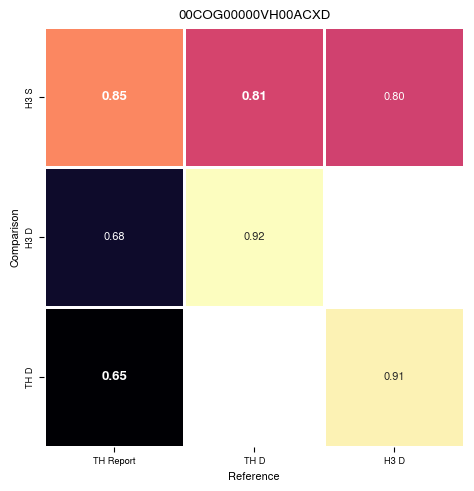

In [98]:
def show_isos(
    case: Literal["Oblique Right", "Oblique Left", "Full Frontal"],
    channels: Optional[List[str]] = None,
    ax: Optional[Axes] = None,
    cmap: Optional[str] = None,
    norm: Optional[str] = None,
) -> None:
    refs = ["TH Report", "TH D", "H3 D"]
    chals = ["TH D", "H3 D", "H3 S"]

    for channel in ALL_GROUPED_ISOS[case].keys() if channels is None else channels:
        LOG.info("Processing %s %s", case, channel)

        av_refs = set(ALL_GROUPED_ISOS[case][channel].columns)
        av_chals = set(ALL_GROUPED_ISOS[case][channel].index)

        selected = defaultdict(dict)
        for ref in refs:
            for chal in chals:
                if ref in av_refs and chal in av_chals:
                    if ref == chal:
                        selected[ref][chal] = np.nan
                    else:
                        selected[ref][chal] = ALL_GROUPED_ISOS[case][channel].loc[chal, ref]

                else:
                    selected[ref][chal] = np.nan
        to_plot = pd.DataFrame(selected, index=chals)

        if ax is None:
            _, ax = plt.subplots(layout="constrained")
        sns.heatmap(
            to_plot,
            annot=True,
            # mask=np.triu(np.ones_like(to_plot, dtype=bool), k=2),
            cbar=False,
            ax=ax,
            vmin=0,
            vmax=1,
            cmap="magma" if cmap is None else cmap,
            linewidth=0.73,
            norm=norm,
            fmt=".2f",
            square=True,
        )
        ax.set_title(channel)
        ax.set_xlabel("Reference")
        ax.set_ylabel("Comparison")
        ax.invert_yaxis()

        # highlight upmid (TH Full Full vehicle vs H3 Buck)
        for t in ax.texts:
            if t.get_position() == (1.5, 2.5) or t.get_position() == (0.5, 0.5) or t.get_position() == (0.5, 2.5):
                t.set_fontsize("large")
                t.set_fontweight("bold")



show_isos("Oblique Right", channels=["00COG00000VH00ACXD"])

2024-02-09 17:43:57,557 MainProcess - MainThread INFO Processing load case Oblique Right with 4 channels || 1585537236.py
locator: <matplotlib.ticker.FixedLocator object at 0x00000269322048D0>
2024-02-09 17:43:57,683 MainProcess - MainThread INFO Processing channel 00COG00000VH00VEXD || 1585537236.py
2024-02-09 17:43:57,684 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00VEXD || 4070181454.py


2024-02-09 17:43:58,004 MainProcess - MainThread INFO Processing channel 00COG00000VH00VEYD || 1585537236.py
2024-02-09 17:43:58,004 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00VEYD || 4070181454.py
2024-02-09 17:43:58,270 MainProcess - MainThread INFO Processing channel 00COG00000VH00ACXD || 1585537236.py
2024-02-09 17:43:58,270 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00ACXD || 4070181454.py
2024-02-09 17:43:58,551 MainProcess - MainThread INFO Processing channel 00COG00000VH00ACYD || 1585537236.py
2024-02-09 17:43:58,551 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00ACYD || 4070181454.py


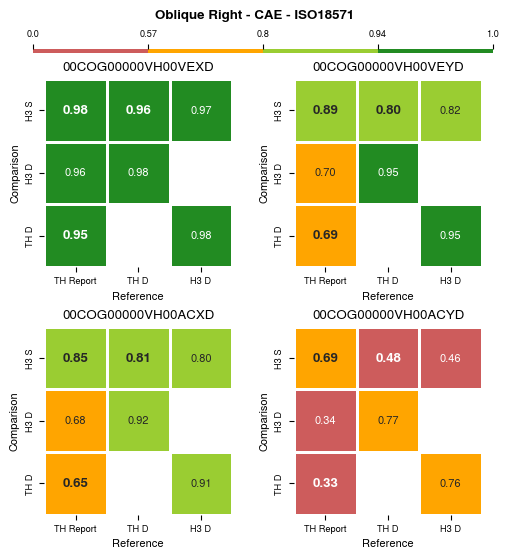

In [99]:
import matplotlib as mpl


def plot_channel_group(
    case: Literal["Oblique Right", "Oblique Left"],
    channels: List[List[str]],
    formats: Optional[List[str]] = None,
    grp_name: Optional[str] = None,
) -> None:
    LOG.info("Processing load case %s with %s channels", case, len(sum(channels, [])))

    fig_width: float = 0.8 * (448.13095 / 72)
    fig_height: float = 1.1 * fig_width
    fig, ax = plt.subplot_mosaic(
        [["none"] * len(channels[0]), *channels],
        figsize=(fig_width, 0.5 * len(channels) * fig_height),
        layout="constrained",
        gridspec_kw={"height_ratios": (0.025, *([1] * len(channels)))},
    )
    fig.suptitle(f"{case} - CAE - ISO18571")
    cmap = mpl.colors.ListedColormap(["indianred", "orange", "yellowgreen", "forestgreen"])
    bounds = [0, 0.575, 0.795, 0.935, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=ax["none"],
        location="top",
    )
    ax["none"].set(frame_on=False)
    ax["none"].set_xticklabels(np.round(bounds, 2))

    for ch in sum(channels, []):
        LOG.info("Processing channel %s", ch)
        show_isos(case=case, channels=[ch], ax=ax[ch], cmap=cmap, norm=norm)

    p_path = Path(r"reports\figures\validity_chain\ISO18571")
    p_path.mkdir(exist_ok=True, parents=True)
    if formats is not None:
        for fmt in formats:
            plt.savefig(p_path / f"{case.replace(' ', '_')}_{grp_name}.{fmt}")


plot_channel_group(
    "Oblique Right",
    [
        ["00COG00000VH00VEXD", "00COG00000VH00VEYD"],
        ["00COG00000VH00ACXD", "00COG00000VH00ACYD"],
    ],
)

2024-02-09 17:44:05,230 MainProcess - MainThread INFO Processing load case Oblique Right with 4 channels || 1585537236.py
locator: <matplotlib.ticker.FixedLocator object at 0x00000269364EFA90>
2024-02-09 17:44:05,312 MainProcess - MainThread INFO Processing channel 00COG00000VH00VEXD || 1585537236.py
2024-02-09 17:44:05,313 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00VEXD || 4070181454.py


2024-02-09 17:44:05,582 MainProcess - MainThread INFO Processing channel 00COG00000VH00VEYD || 1585537236.py
2024-02-09 17:44:05,582 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00VEYD || 4070181454.py
2024-02-09 17:44:05,797 MainProcess - MainThread INFO Processing channel 00COG00000VH00ACXD || 1585537236.py
2024-02-09 17:44:05,797 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00ACXD || 4070181454.py
2024-02-09 17:44:05,993 MainProcess - MainThread INFO Processing channel 00COG00000VH00ACYD || 1585537236.py
2024-02-09 17:44:05,993 MainProcess - MainThread INFO Processing Oblique Right 00COG00000VH00ACYD || 4070181454.py
2024-02-09 17:44:07,541 MainProcess - MainThread INFO Processing load case Oblique Right with 8 channels || 1585537236.py
locator: <matplotlib.ticker.FixedLocator object at 0x000002693333FA90>
2024-02-09 17:44:07,668 MainProcess - MainThread INFO Processing channel 01FAB00000VH00PRRD || 1585537236.py
2024-02-09 17:44:07,668 Ma

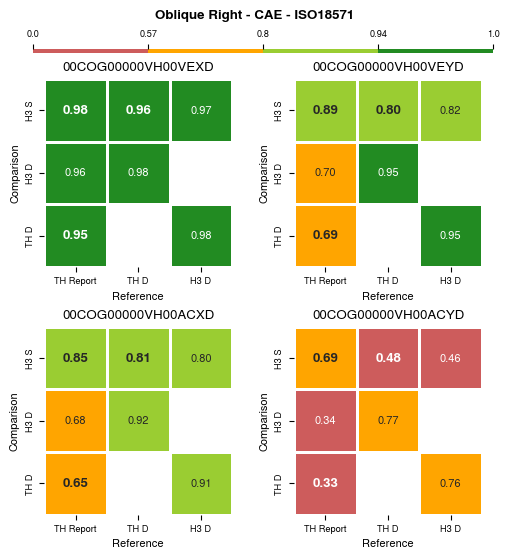

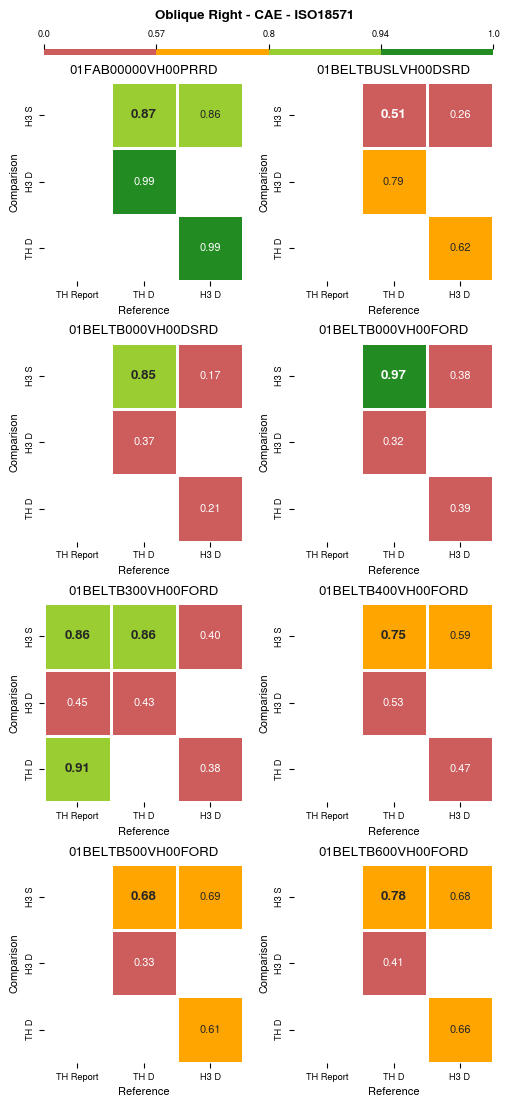

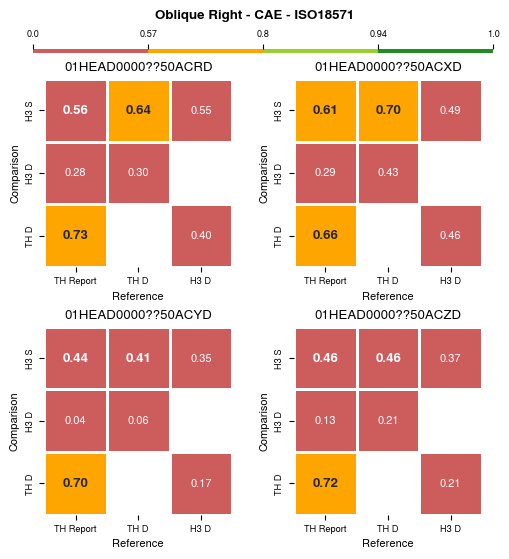

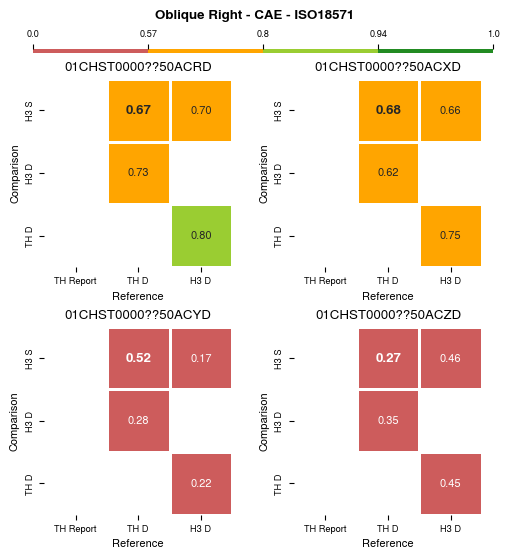

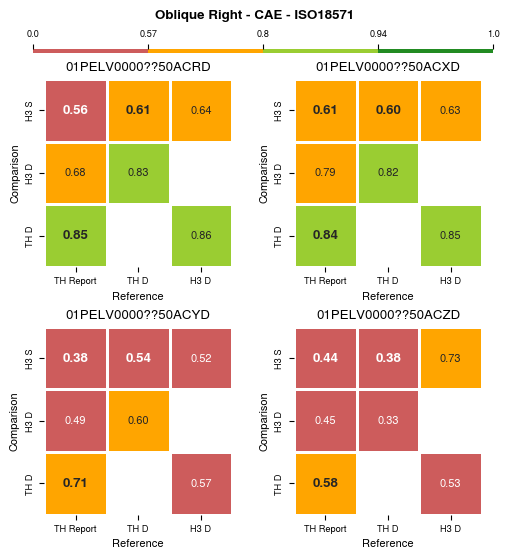

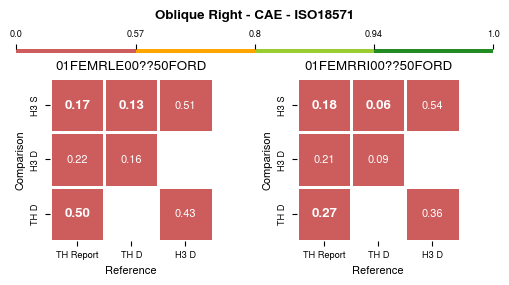

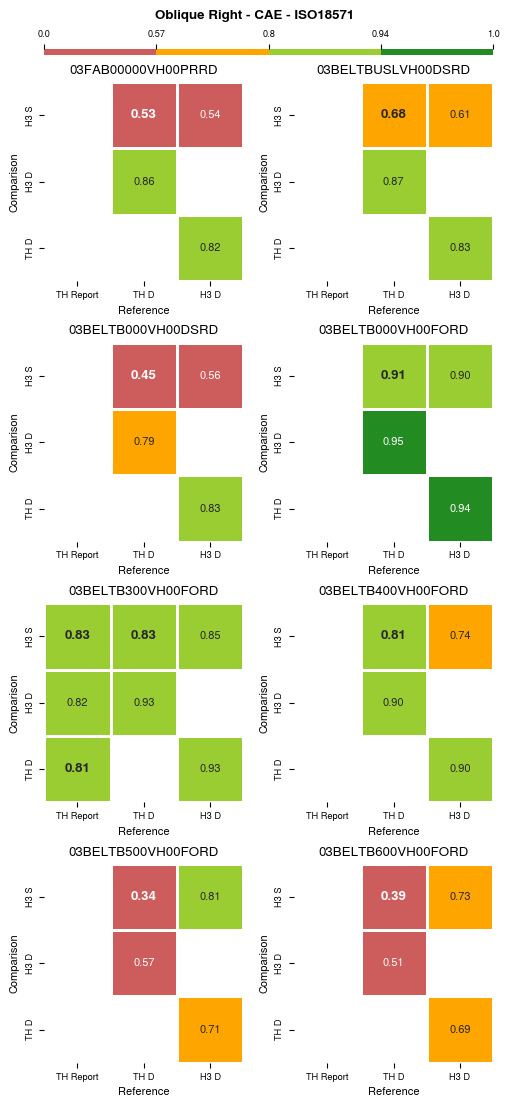

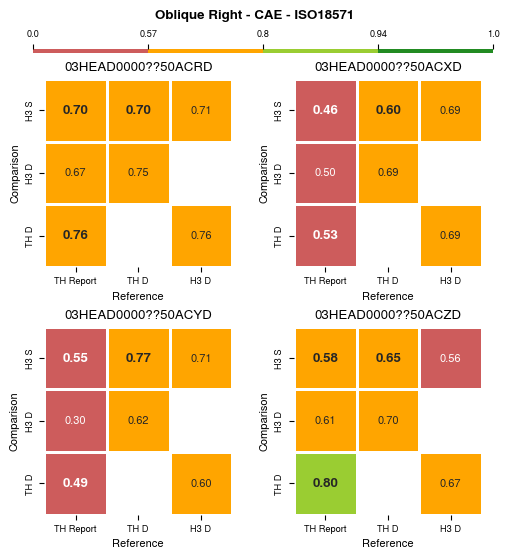

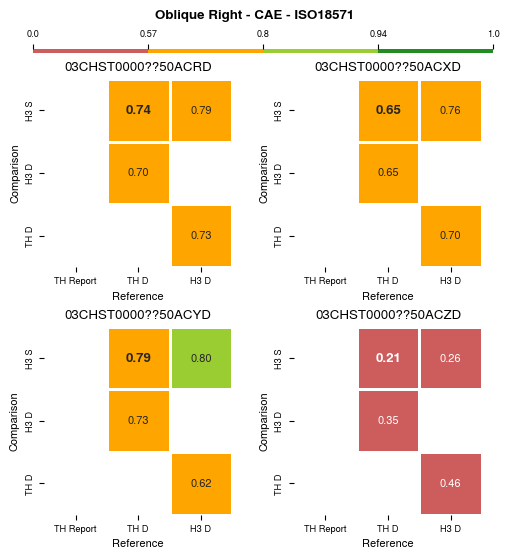

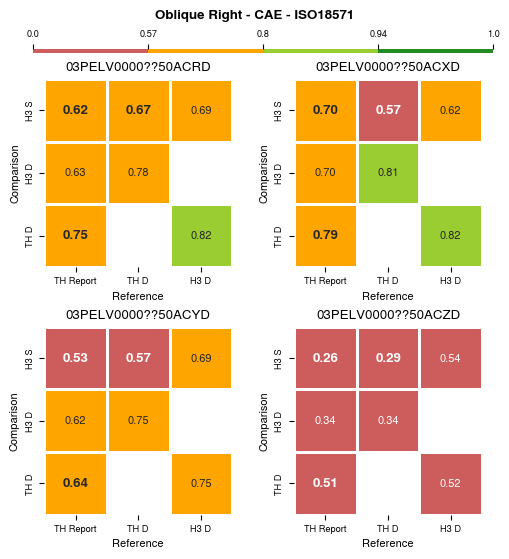

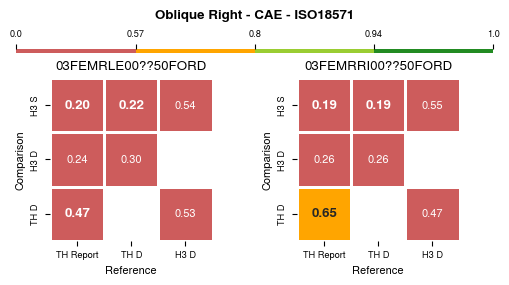

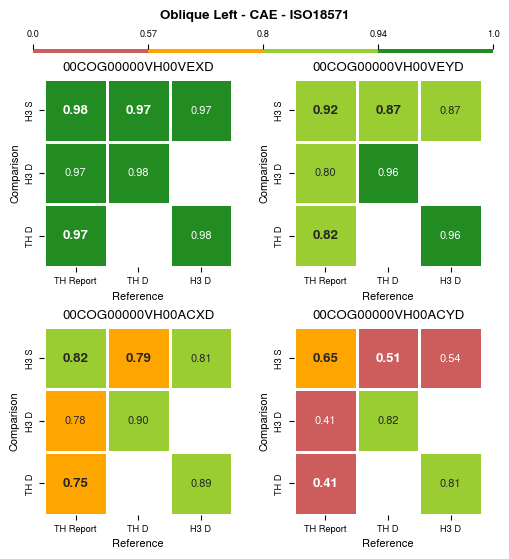

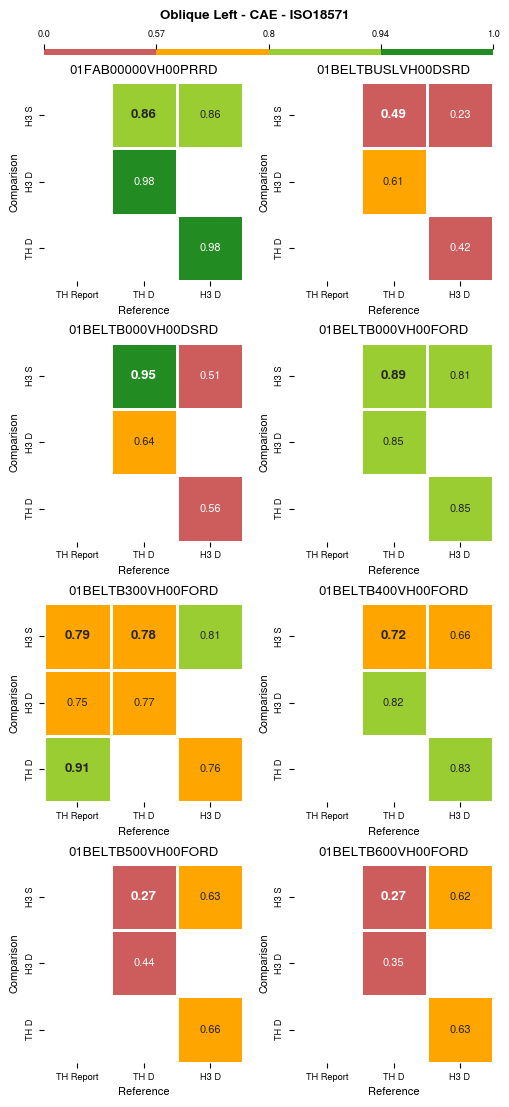

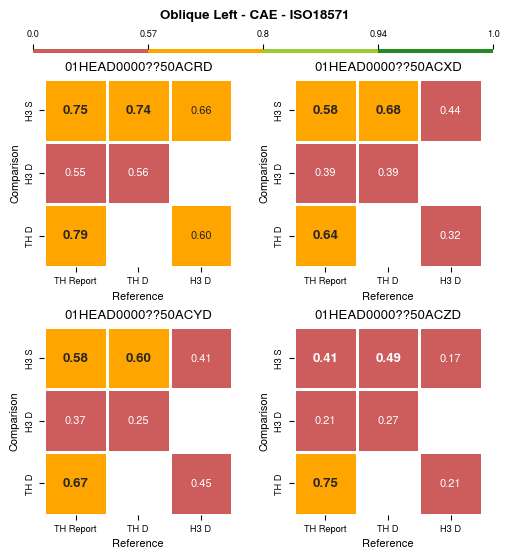

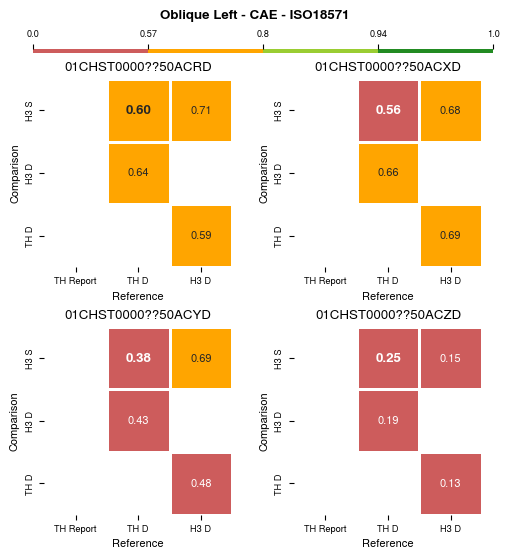

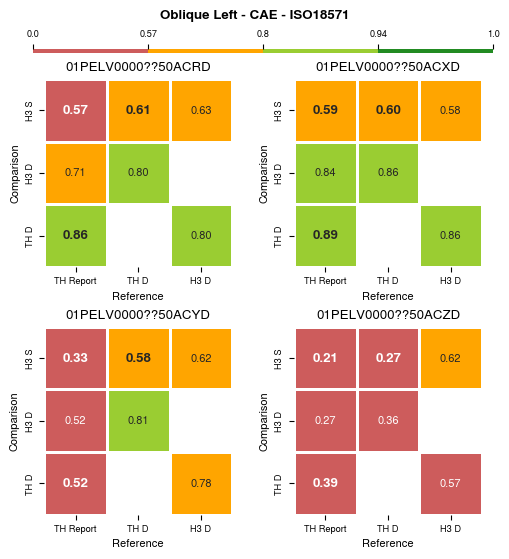

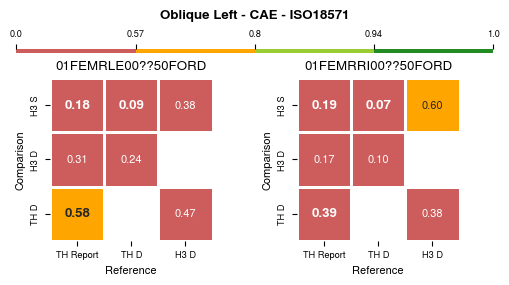

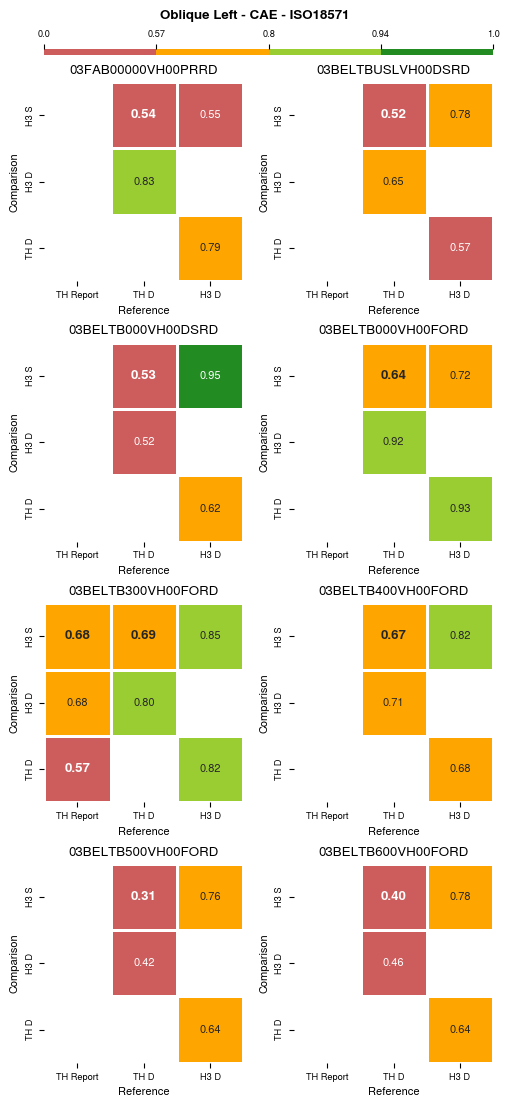

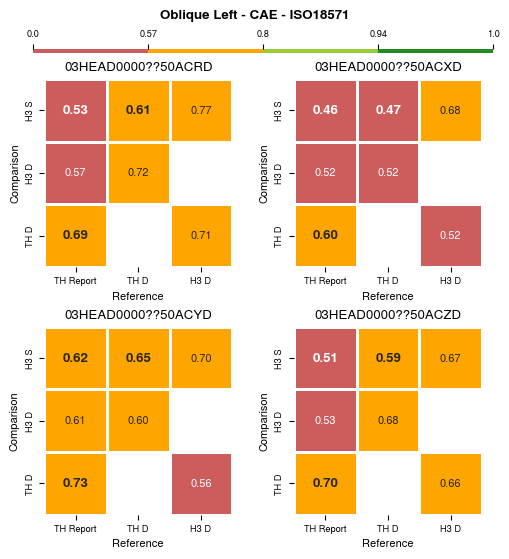

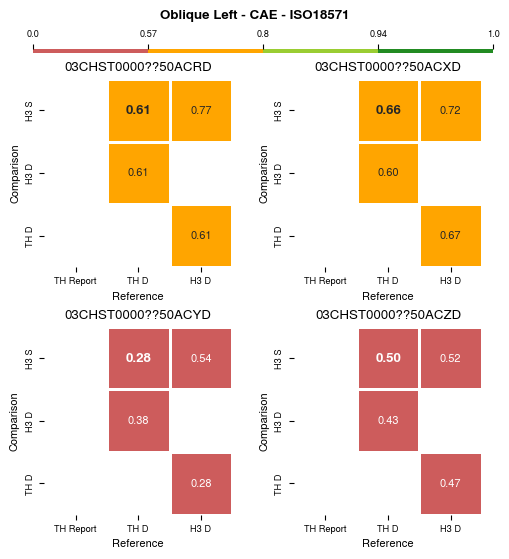

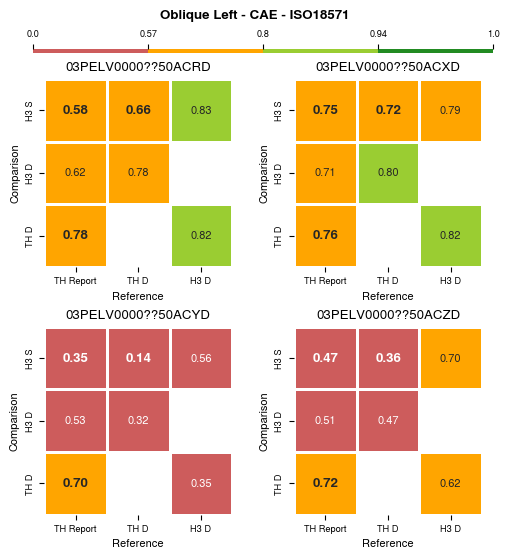

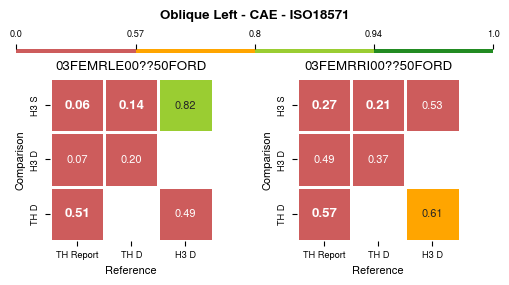

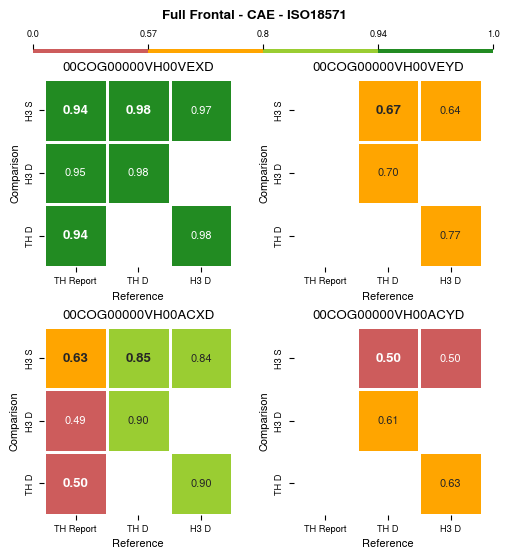

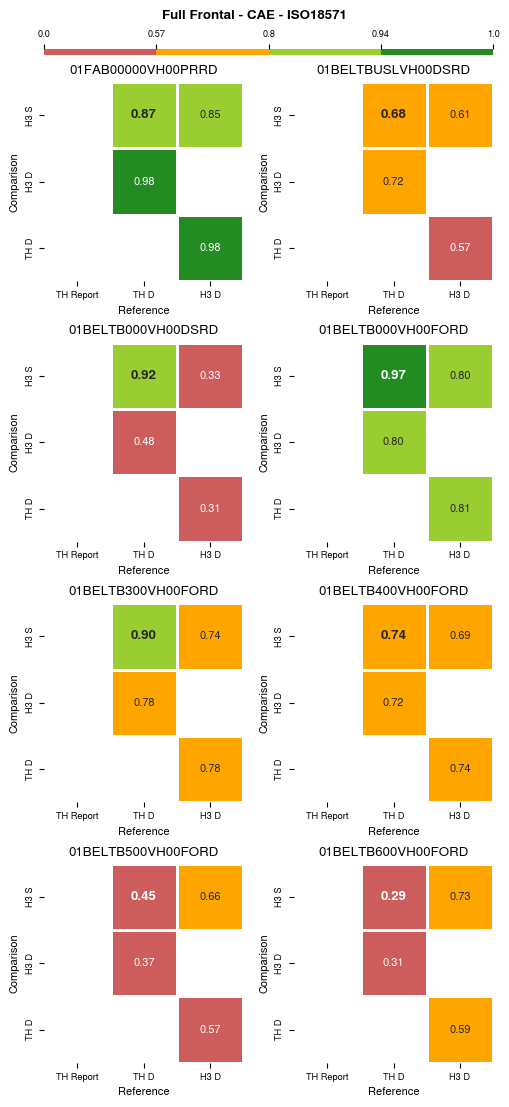

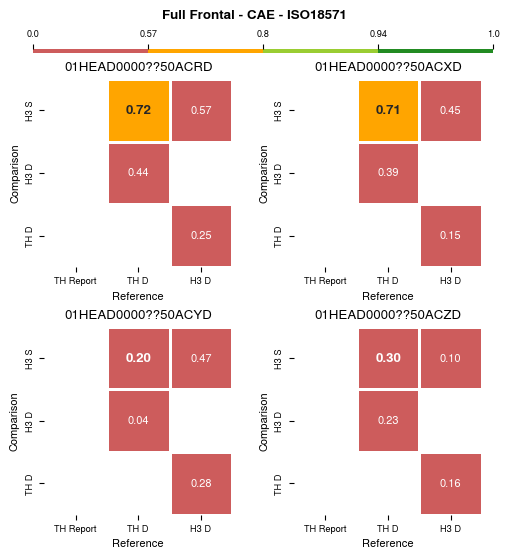

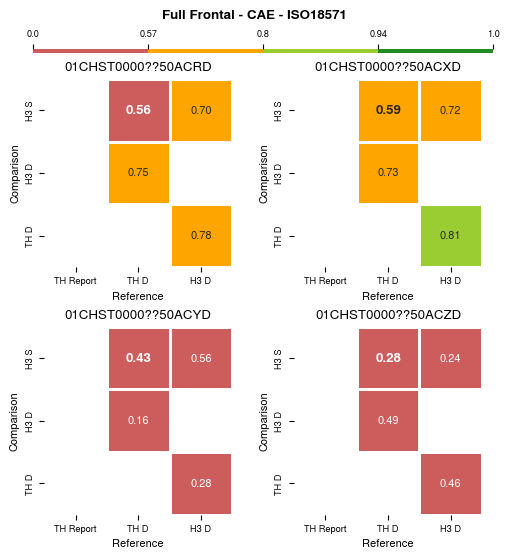

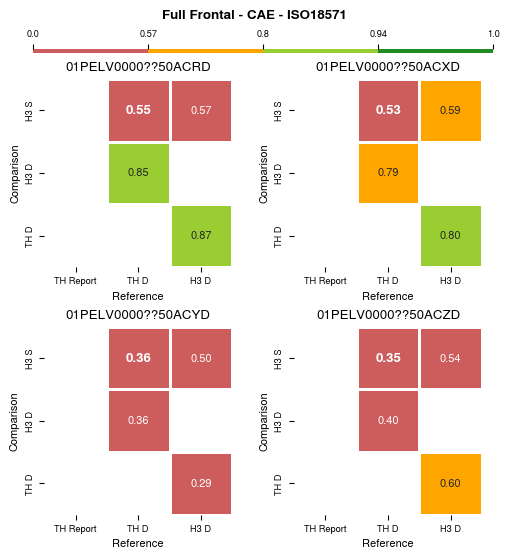

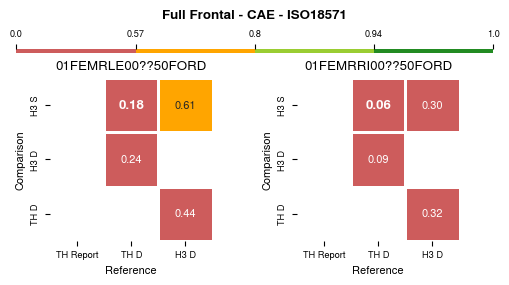

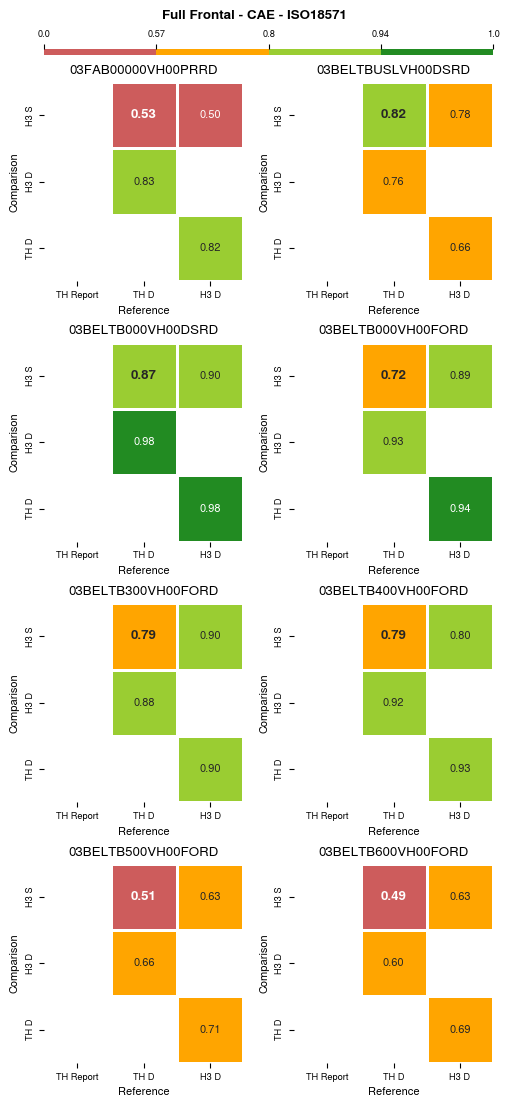

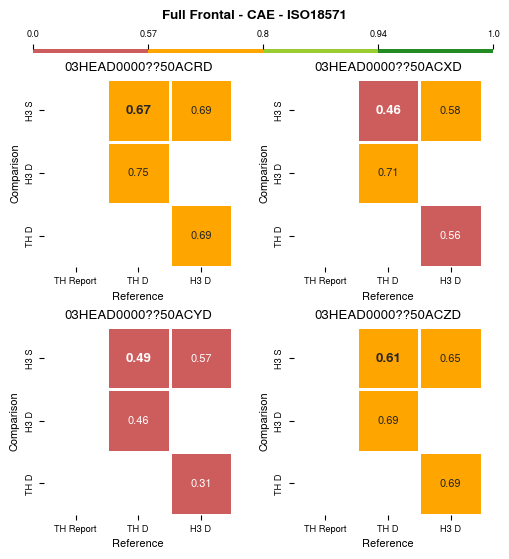

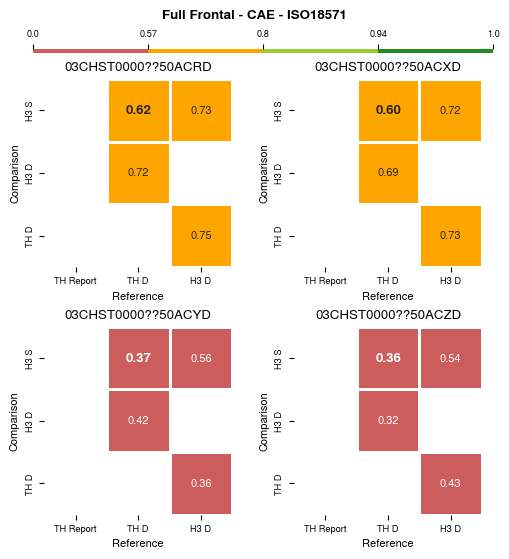

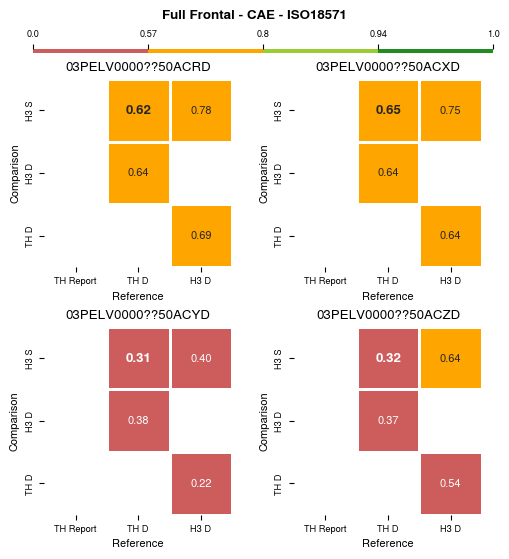

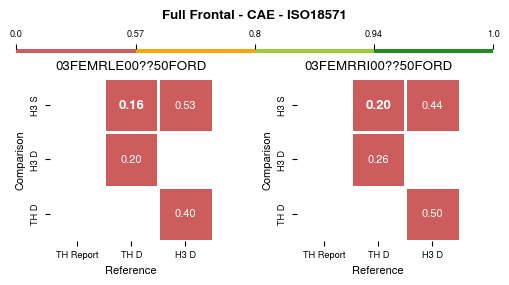

In [100]:
# pulse
channel_sets = {
    "Pulses": [
        ["00COG00000VH00VEXD", "00COG00000VH00VEYD"],
        ["00COG00000VH00ACXD", "00COG00000VH00ACYD"],
    ]
}

# RHS
for s in ("01", "03"):
    # RHS
    channel_sets[f"{s}_RHS"] = [
        [f"{s}FAB00000VH00PRRD", f"{s}BELTBUSLVH00DSRD"],
        [f"{s}BELTB000VH00DSRD", f"{s}BELTB000VH00FORD"],
        [f"{s}BELTB300VH00FORD", f"{s}BELTB400VH00FORD"],
        [f"{s}BELTB500VH00FORD", f"{s}BELTB600VH00FORD"],
    ]

    # body
    for part in ("HEAD", "CHST", "PELV"):
        channel_sets[f"{s}_{part}"] = [
            [f"{s}{part}0000??50ACRD", f"{s}{part}0000??50ACXD"],
            [f"{s}{part}0000??50ACYD", f"{s}{part}0000??50ACZD"],
        ]

    # femur
    channel_sets[f"{s}_FMR"] = [
        [f"{s}FEMRLE00??50FORD", f"{s}FEMRRI00??50FORD"],
    ]

for case in ("Oblique Right", "Oblique Left", "Full Frontal"):
    for channel_set in channel_sets.keys():
        plot_channel_group(case=case, channels=channel_sets[channel_set], formats=["png", "pdf"], grp_name=channel_set)